# Random walk in financial markets

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

A Monte Carlo simulation technique will be used for investigating the potential evolution of asset prices over time. We assume that the evolution is subject to daily returns that follow a normal distribution. This type of price evolution is also known as a “random walk”.

The following piece of code loads the market prices for Alphabet Inc. (GOOGL) over the past 15 years.


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


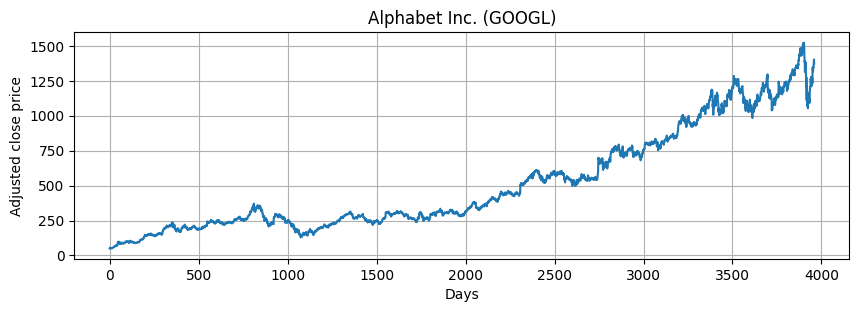

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
 
alpha = data.DataReader('GOOGL', 'yahoo', start='8/19/2004')
price = alpha['Adj Close'].values

plt.figure(figsize=(10,3), dpi=100)
plt.plot(price)
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Adjusted close price')
plt.title('Alphabet Inc. (GOOGL)')
plt.show()

The daily return is the daily growth rate in percentage, 

$$
  r_t = \frac{p_t - p_{t-1}}{p_{t-1}}\times 100 \text{  (%)}
$$


where $p_t$ represents the price at day $t$. 





The volatility is defined by the standard deviation of the return, and the annual volatility $v$ is the standard deviation multiplied by $\sqrt{252}$ 

$$
  \sigma_\text{annually} = \sqrt{\frac{252}{\tau}\sum_{t}^\tau\left({r_t - \bar{r}}\right)^2}
$$

where we assume that the stock market opens 252 days per year, and $\tau$ is the number of data points we are considering.

_**(Problem 1)**_ What is the annual volatility for this asset?

In [2]:
# your code here
r_t = np.zeros(len(price))
for i in range(1, len(price)):
  r_t[i] = (price[i] - price[i-1]) / price[i-1]

r_avg = sum(r_t) / len(r_t)

sigma_annually = np.sqrt((252/len(price)) * sum((r_t - r_avg)**2))

print(sigma_annually)

0.3063946578114749


Compound annual growth rate (CAGR) is the rate of return that would be required for an investment to grow from its beginning balance to its ending balance, assuming the profits were reinvested at the end of each year of the investment’s lifespan.

$$
\text{CAGR} = \left(\left(\frac{p_\tau}{p_1}\right)^{252/\tau}-1\right)\times 100 \text{ (%)}
$$


_**(Problem 2)**_ What is the compound annual growth rate for this asset?

In [3]:
# your code here

CAGR = pow(price[-1] / price[0], 252/len(price)) - 1
print('%.3f' % (CAGR*100), '%', sep='')

23.446%


So we characterized the time evolution of this asset's price by two numbers, the compound annual growth rate (average return) and the annual volatility (risk).

Now we can predict the future prices by using those two factors. That is,

$$
  p_{t+1} = p_{t}\left( 1+\tilde{r}_{t}\right)
$$

where $\tilde{r}_{t}$ is sampled from Gaussian distribution with mean value $\text{CAGR}/252$ and standard deviation $\sigma_\text{annually}/\sqrt{252}$.

_**(Problem 3)**_ Predict the price for the next year, in other words, predict $p_{\tau+1},\dots,p_{\tau+252}$. Overlap the predicted price and the past price history on the same plot. Do they look natural?

In [0]:
predicted_r = np.random.randn(252) * (sigma_annually/np.sqrt(252)) + (CAGR/252)
predicted_p = np.zeros(len(predicted_r))

predicted_p[0] = price[-1] * (1 + predicted_r[0])
for i in range(1, len(predicted_r)):
  predicted_p[i] = predicted_p[i-1] * (1 + predicted_r[i-1])

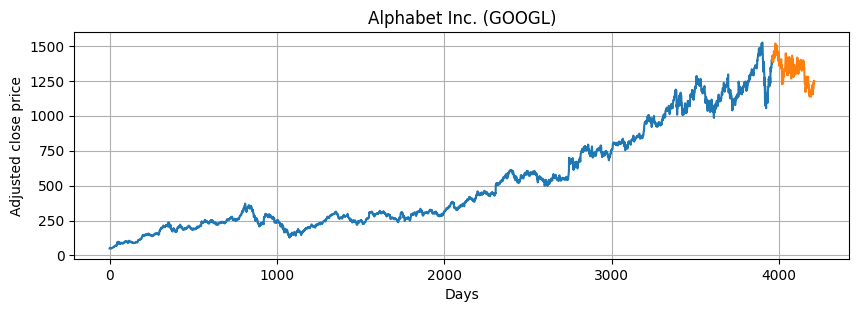

In [5]:
plt.figure(figsize=(10,3), dpi=100)
plt.plot(price)
plt.plot([i + len(price) for i in range(len(predicted_p))], predicted_p)
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Adjusted close price')
plt.title('Alphabet Inc. (GOOGL)')
plt.show()

_**(Problem4)**_ Run the above simulation for 10000 instances, and display the histogram of the value that this asset will be evaluated after one year.


In [0]:
# your code here
predicted_r_series = [0 for i in range(10000)]
predicted_p_series = [0 for i in range(10000)]

for i in range(10000):
  predicted_r_series[i] = np.random.randn(252) * (sigma_annually/np.sqrt(252)) + (CAGR/252)
  predicted_p_series[i] = np.zeros(len(predicted_r_series[i]))

  predicted_p_series[i][0] = price[-1] * (1 + predicted_r_series[i][0])
  for j in range(1, len(predicted_r)):
    predicted_p_series[i][j] = predicted_p_series[i][j-1] * (1 + predicted_r_series[i][j-1])

predicted_p_after_1_year = [predicted_p_series[i][-1] for i in range(10000)]

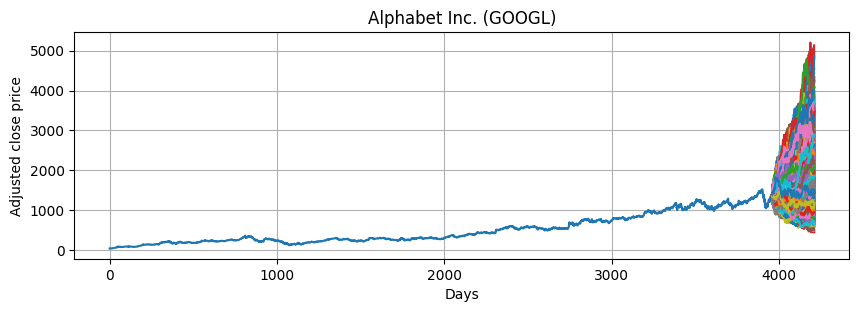

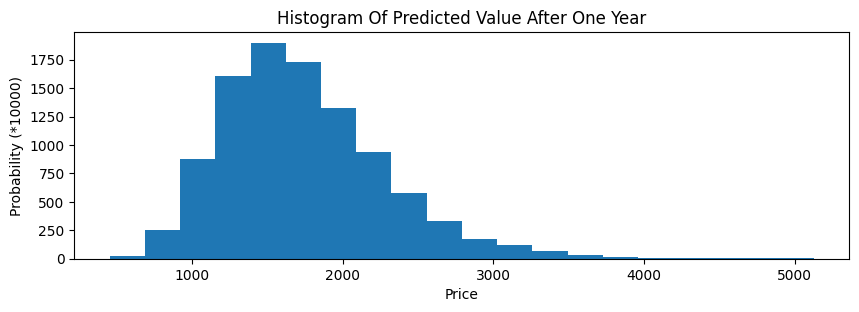

In [11]:
plt.figure(figsize=(10,3), dpi=100)
plt.plot(price)
for i in range(10000):
  plt.plot([j + len(price) for j in range(len(predicted_p_series[i]))], predicted_p_series[i])
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Adjusted close price')
plt.title('Alphabet Inc. (GOOGL)')
plt.show()

plt.figure(figsize=(10,3), dpi=100)
plt.hist(predicted_p_after_1_year, bins = 20)
plt.xlabel('Price')
plt.ylabel('Probability (*10000)')
plt.title('Histogram Of Predicted Value After One Year')
plt.show()

_**(Problem 5)**_  What is the expected value that this asset will be evaluated, after one year? What is the minimum value that this asset will be evaluated with 95% probability, after one year? What is the probability that the value of this asset will be doubled in the next year?

In [8]:
# your code here
predicted_p_after_1_year.sort()

print('Expected value that this asset will be evaluated, after one year : {}'.format(np.average(predicted_p_after_1_year)))
print('Minimum value that this asset will be evaluated with 95% probability, after one year : {}'.format(predicted_p_after_1_year[500]))

P_price_less_than_double = 0
for i in range(len(predicted_p_after_1_year)):
  if predicted_p_after_1_year[i] >= price[-1]*2:
    P_price_less_than_double = i-1
    break

print('probability that the value of this asset will be doubled in the next year : {}%'.format((10000 - P_price_less_than_double) / 100))

Expected value that this asset will be evaluated, after one year : 1741.118467378419
Minimum value that this asset will be evaluated with 95% probability, after one year : 1003.4637700354297
probability that the value of this asset will be doubled in the next year : 4.83%
